# 07. Software Development and Data Analysis Agents

# 安装依赖

In [1]:
%uv pip install langchain~=0.3 langchain-core~=0.3 langchain-community~=0.3 langchain-openai~=0.3 langgraph~=0.6

Resolved 59 packages in 1.27s                                        
⠙ Preparing packages... (0/58)                                                  
⠙ Preparing packages... (0/58)-------------     0 B/236.73 KiB          
⠙ Preparing packages... (0/58)-------------     0 B/236.73 KiB          
typing-extensions    ------------------------------     0 B/43.57 KiB
⠙ Preparing packages... (0/58)-------------     0 B/236.73 KiB          
typing-extensions    ------------------------------     0 B/43.57 KiB
⠙ Preparing packages... (0/58)-------------     0 B/236.73 KiB          
typing-extensions    ------------------------------     0 B/43.57 KiB
⠙ Preparing packages... (0/58)-------------     0 B/236.73 KiB          
typing-extensions    ------------------------------     0 B/43.57 KiB
tqdm                 ------------------------------     0 B/76.70 KiB
⠙ Preparing packages... (0/58)-------------     0 B/236.73 KiB          
typing-extensions    ------------------------------     0 B/4

In [2]:
%uv pip install langchain-anthropic~=0.3

Resolved 30 packages in 631ms                                        
⠙ Preparing packages... (0/3)                                                   
⠙ Preparing packages... (0/3)--------------     0 B/36.03 KiB           
⠹ Preparing packages... (0/3)-------------- 16.00 KiB/36.03 KiB         
⠹ Preparing packages... (0/3)-------------- 16.00 KiB/36.03 KiB         
⠹ Preparing packages... (0/3)---------- 32.00 KiB/36.03 KiB         
⠹ Preparing packages... (0/3)---------- 36.03 KiB/36.03 KiB         
⠹ Preparing packages... (0/3)0/3)                                                   
⠹ Preparing packages... (0/3)--------------     0 B/359.22 KiB          
⠹ Preparing packages... (0/3)-------------- 14.88 KiB/359.22 KiB        
⠹ Preparing packages... (0/3)-------------- 30.88 KiB/359.22 KiB        
⠹ Preparing packages... (0/3)-------------- 46.88 KiB/359.22 KiB        
⠹ Preparing packages... (0/3)-------------- 62.88 KiB/359.22 KiB        
⠸ Preparing packages... (1/3)-------------

In [3]:
%uv pip install python-dotenv~=1.1

Audited 1 package in 1ms
Note: you may need to restart the kernel to use updated packages.


工具类

In [ ]:
import os

import dotenv
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_anthropic import ChatAnthropic


class Config:
    def __init__(self):
        # By default, load_dotenv doesn't override existing environment variables and looks for a .env file in same directory as python script or searches for it incrementally higher up.
        dotenv_path = dotenv.find_dotenv(usecwd=True)
        if not dotenv_path:
            raise ValueError("No .env file found")
        dotenv.load_dotenv(dotenv_path=dotenv_path)

        api_key = os.getenv("OPENAI_API_KEY")
        if not api_key:
            raise ValueError("OPENAI_API_KEY is not set")

        base_url = os.getenv("OPENAI_API_BASE_URL")
        if not base_url:
            raise ValueError("OPENAI_API_BASE_URL is not set")

        model = os.getenv("OPENAI_MODEL")
        if not model:
            raise ValueError("OPENAI_MODEL is not set")

        coder_model = os.getenv("OPENAI_CODER_MODEL")
        if not coder_model:
            raise ValueError("OPENAI_MODEL is not set")

        self.api_key = api_key
        self.base_url = base_url
        self.model = model
        self.coder_model = coder_model

        self.anthropic_api_key = os.getenv("ANTHROPIC_API_KEY")
        self.anthropic_base_url = os.getenv("ANTHROPIC_BASE_URL")
        self.anthropic_model = os.getenv("ANTHROPIC_MODEL")

        self.embeddings_model = os.getenv("OPENAI_EMBEDDINGS_MODEL")

        hf_pretrained_embeddings_model = os.getenv("HF_PRETRAINED_EMBEDDINGS_MODEL")
        self.hf_pretrained_embeddings_model = (
            hf_pretrained_embeddings_model
            if hf_pretrained_embeddings_model
            else "Qwen/Qwen3-Embedding-8B"
        )

    def new_anthropic(self, **kwargs) -> ChatAnthropic:
        # 参考：https://bailian.console.aliyun.com/?tab=api#/api/?type=model&url=2587654
        # 参考：https://help.aliyun.com/zh/model-studio/models
        # ChatOpenAI 文档参考：https://python.langchain.com/api_reference/openai/chat_models/langchain_openai.chat_models.base.ChatOpenAI.html#langchain_openai.chat_models.base.ChatOpenAI
        return ChatAnthropic(
            api_key=self.anthropic_api_key,
            base_url=self.anthropic_base_url,
            model=self.anthropic_model,
            **kwargs,
        )

    def new_openai_like_coder(self, **kwargs) -> ChatOpenAI:
        # 参考：https://bailian.console.aliyun.com/?tab=api#/api/?type=model&url=2587654
        # 参考：https://help.aliyun.com/zh/model-studio/models
        # ChatOpenAI 文档参考：https://python.langchain.com/api_reference/openai/chat_models/langchain_openai.chat_models.base.ChatOpenAI.html#langchain_openai.chat_models.base.ChatOpenAI
        return ChatOpenAI(
            api_key=self.api_key,
            base_url=self.base_url,
            model=self.coder_model,
            **kwargs,
        )

    def new_openai_like(self, **kwargs) -> ChatOpenAI:
        # 参考：https://bailian.console.aliyun.com/?tab=api#/api/?type=model&url=2587654
        # 参考：https://help.aliyun.com/zh/model-studio/models
        # ChatOpenAI 文档参考：https://python.langchain.com/api_reference/openai/chat_models/langchain_openai.chat_models.base.ChatOpenAI.html#langchain_openai.chat_models.base.ChatOpenAI
        model = kwargs.pop("model", self.model)
        return ChatOpenAI(
            api_key=self.api_key, base_url=self.base_url, model=model, **kwargs
        )

    def new_openai_like_embeddings(self, **kwargs) -> OpenAIEmbeddings:
        if not self.embeddings_model:
            raise ValueError("OPENAI_EMBEDDINGS_MODEL is not set")
        # print("embeddings_model:", self.embeddings_model)

        # 参考：https://python.langchain.com/api_reference/openai/embeddings/langchain_openai.embeddings.base.OpenAIEmbeddings.html#langchain_openai.embeddings.base.OpenAIEmbeddings
        return OpenAIEmbeddings(
            api_key=self.api_key,
            base_url=self.base_url,
            model=self.embeddings_model,
            # https://python.langchain.com/api_reference/openai/embeddings/langchain_openai.embeddings.base.OpenAIEmbeddings.html#langchain_openai.embeddings.base.OpenAIEmbeddings.tiktoken_enabled
            # 对于非 OpenAI 的官方实现，将这个参数置为 False。
            # 回退到用 huggingface transformers 库 AutoTokenizer 来处理 token。
            tiktoken_enabled=False,
            # https://python.langchain.com/api_reference/openai/embeddings/langchain_openai.embeddings.base.OpenAIEmbeddings.html#langchain_openai.embeddings.base.OpenAIEmbeddings.model
            # 元宝说 Jina 的 embedding 模型 https://huggingface.co/jinaai/jina-embeddings-v4 最接近
            # text-embedding-ada-002
            # 个人喜好，选了 Qwen/Qwen3-Embedding-8B
            # tiktoken_model_name='Qwen/Qwen3-Embedding-8B',
            tiktoken_model_name=self.hf_pretrained_embeddings_model,
            **kwargs,
        )


def must_get_hfh_api_token() -> str:
    """
    从环境变量或者 .env 环境获取 HuggingFaceHub 的 API 令牌
    """
    # By default, load_dotenv doesn't override existing environment variables and looks for a .env file in same directory as python script or searches for it incrementally higher up.
    dotenv_path = dotenv.find_dotenv(usecwd=True)
    if not dotenv_path:
        raise ValueError("No .env file found")
    dotenv.load_dotenv(dotenv_path=dotenv_path)

    out = os.getenv("HUGGINGFACEHUB_API_TOKEN")
    if not out:
        raise ValueError("HUGGINGFACEHUB_API_TOKEN is not set")

    return out

/github.com/sammyne/generative-ai-with-lang-chain-2ed/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


## LLMs in software development
### The future of development
### Implementation considerations
### Evolution of code LLMs
### Benchmarks for code LLMs
### LLM-based software engineering approaches
### Security and risk mitigation
### Validation framework for LLM-generated code
### LangChain integrations
## Writing code with LLMs
### Google generative AI
replaced by Qwen as

In [2]:
question = """
Given an integer n, return a string array answer (1-indexed) where:

answer[i] == "FizzBuzz" if i is divisible by 3 and 5.
answer[i] == "Fizz" if i is divisible by 3.
answer[i] == "Buzz" if i is divisible by 5.
answer[i] == i (as a string) if none of the above conditions are true.
"""

llm = Config().new_openai_like_coder()

# 调用 print 格式化输出
print(llm.invoke(question).content)

Looking at this FizzBuzz problem, I need to iterate through numbers from 1 to n and apply the given conditions.

Let me break down the logic:
- If divisible by both 3 and 5 → "FizzBuzz"
- If divisible by 3 only → "Fizz" 
- If divisible by 5 only → "Buzz"
- Otherwise → the number as string

Here's my solution:

```python
def fizzBuzz(n):
    result = []
    
    for i in range(1, n + 1):
        if i % 3 == 0 and i % 5 == 0:
            result.append("FizzBuzz")
        elif i % 3 == 0:
            result.append("Fizz")
        elif i % 5 == 0:
            result.append("Buzz")
        else:
            result.append(str(i))
    
    return result
```

Alternative approach (more efficient):
```python
def fizzBuzz(n):
    result = []
    
    for i in range(1, n + 1):
        output = ""
        if i % 3 == 0:
            output += "Fizz"
        if i % 5 == 0:
            output += "Buzz"
        if output == "":
            output = str(i)
        result.append(output)
    
    return 

### Hugging Face [没跑通]

In [6]:
# Define the input text
text = """
def calculate_primes(n):
    \"\"\"Create a list of consecutive integers from 2 up to N.

    For example:
    >>> calculate_primes(20)
    Output: [2, 3, 5, 7, 11, 13, 17, 19]
    \"\"\"
"""

In [7]:
%uv pip install huggingface-hub~=0.35

Resolved 13 packages in 481ms                                        
⠙ Preparing packages... (0/4)                                                   
⠙ Preparing packages... (0/4)--------------     0 B/196.26 KiB          
⠙ Preparing packages... (0/4)--------------     0 B/196.26 KiB          
fsspec               ------------------------------     0 B/196.26 KiB
⠙ Preparing packages... (0/4)--------------     0 B/552.83 KiB          
fsspec               ------------------------------     0 B/196.26 KiB
⠙ Preparing packages... (0/4)--------------     0 B/552.83 KiB          
fsspec               ------------------------------     0 B/196.26 KiB
⠙ Preparing packages... (0/4)--------------     0 B/552.83 KiB          
filelock             ------------------------------     0 B/15.68 KiB
fsspec               ------------------------------     0 B/196.26 KiB
⠙ Preparing packages... (0/4)--------------     0 B/552.83 KiB          
filelock             ------------------------------     0

In [8]:
from langchain.llms import HuggingFaceHub

# Choose a lightweight model good for code generation
repo_id = "bigcode/starcoder"

# Initialize the HuggingFaceHub LLM
llm = HuggingFaceHub(
    repo_id=repo_id,
    task="text-generation",
    model_kwargs={"temperature": 0.5, "max_length": 1000},
    huggingfacehub_api_token=must_get_hfh_api_token(),
)

# Use the LangChain LLM to generate text
output = llm.invoke(text)
print(output)

/tmp/ipykernel_2771350/1608604917.py:7: LangChainDeprecationWarning: The class `HuggingFaceHub` was deprecated in LangChain 0.0.21 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEndpoint``.
  llm = HuggingFaceHub(
/github.com/sammyne/generative-ai-with-lang-chain-2ed/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AttributeError: 'InferenceClient' object has no attribute 'post'

In [9]:
%uv pip install langchain-huggingface~=0.3

Resolved 32 packages in 572ms                                        
⠙ Preparing packages... (0/2)                                                   
⠙ Preparing packages... (0/2)--------------     0 B/3.10 MiB            
⠙ Preparing packages... (0/2)---------------     0 B/3.10 MiB           
langchain-huggingface ------------------------------     0 B/26.96 KiB
⠙ Preparing packages... (0/2)---------------     0 B/3.10 MiB           
langchain-huggingface ------------------------------ 16.00 KiB/26.96 KiB
⠙ Preparing packages... (0/2)---------------     0 B/3.10 MiB           
langchain-huggingface ------------------------------ 26.96 KiB/26.96 KiB
⠙ Preparing packages... (0/2)---------------     0 B/3.10 MiB           
langchain-huggingface ------------------------------ 26.96 KiB/26.96 KiB
⠙ Preparing packages... (0/2)---------------     0 B/3.10 MiB           
⠹ Preparing packages... (1/2)---------------     0 B/3.10 MiB           
⠹ Preparing packages... (1/2)---------------    

In [10]:
from langchain_huggingface import HuggingFaceEndpoint

# Choose a lightweight model good for code generation
repo_id = "bigcode/starcoder"

# Initialize the HuggingFaceHub LLM
# llm = HuggingFaceHub(
#     repo_id=repo_id,
#     task="text-generation",
#     model_kwargs={"temperature": 0.5, "max_length": 1000},
#     huggingfacehub_api_token=must_get_hfh_api_token(),
# )

llm = HuggingFaceEndpoint(
    repo_id=repo_id,
    # max_length=128,
    temperature=0.5,
    huggingfacehub_api_token=must_get_hfh_api_token(),
    provider="huggingface",  # set your provider here hf.co/settings/inference-providers
    # provider="hyperbolic",
    # provider="nebius",
    # provider="together",
)

# Use the LangChain LLM to generate text
output = llm.invoke(text)
print(output)

ValueError: Provider 'huggingface' not supported. Available values: 'auto' or any provider from ['black-forest-labs', 'cerebras', 'clarifai', 'cohere', 'fal-ai', 'featherless-ai', 'fireworks-ai', 'groq', 'hf-inference', 'hyperbolic', 'nebius', 'novita', 'nscale', 'openai', 'publicai', 'replicate', 'sambanova', 'scaleway', 'together', 'zai-org'].Passing 'auto' (default value) will automatically select the first provider available for the model, sorted by the user's order in https://hf.co/settings/inference-providers.

### Anthropic

In [11]:
from langchain_core.prompts.prompt import PromptTemplate

template = """Question: {question}
Let's think step by step.

Answer:
"""

prompt = PromptTemplate(template=template, input_variables=["question"])
llm = Config().new_anthropic()

llm_chain = prompt | llm
print(llm_chain.invoke(text).content)

I need to implement the `calculate_primes` function that returns all prime numbers from 2 up to n using the Sieve of Eratosthenes algorithm.

Let me think through the steps:

1. Create a list of consecutive integers from 2 to n
2. Mark non-prime numbers by eliminating multiples of each prime
3. Return only the numbers that remain marked as prime

Here's my implementation:

```python
def calculate_primes(n):
    """Create a list of consecutive integers from 2 up to N.

    For example:
    >>> calculate_primes(20)
    Output: [2, 3, 5, 7, 11, 13, 17, 19]
    """
    if n < 2:
        return []
    
    # Create a boolean list "prime[0..n]" and initialize all entries as True
    prime = [True] * (n + 1)
    prime[0] = prime[1] = False  # 0 and 1 are not prime numbers
    
    p = 2
    while p * p <= n:
        # If prime[p] is not changed, then it is a prime
        if prime[p]:
            # Update all multiples of p
            for i in range(p * p, n + 1, p):
                prime[i]

### Agentic approach

In [14]:
%uv pip install 'langchain-experimental>=0.3,<0.4'

Resolved 47 packages in 397ms                                        
⠙ Preparing packages... (0/1)                                                   
⠙ Preparing packages... (0/1)----------------     0 B/204.25 KiB        
⠹ Preparing packages... (0/1)---------------- 14.90 KiB/204.25 KiB      
⠹ Preparing packages... (0/1)---------------- 14.90 KiB/204.25 KiB      
⠹ Preparing packages... (0/1)---------------- 30.90 KiB/204.25 KiB      
⠹ Preparing packages... (0/1)---------------- 46.90 KiB/204.25 KiB      
⠹ Preparing packages... (0/1)---------------- 62.90 KiB/204.25 KiB      
⠸ Preparing packages... (0/1)---------------- 78.90 KiB/204.25 KiB      
⠸ Preparing packages... (0/1)---------------- 78.90 KiB/204.25 KiB      
⠸ Preparing packages... (0/1)---------------- 94.90 KiB/204.25 KiB      
⠸ Preparing packages... (0/1)------------- 110.90 KiB/204.25 KiB     
⠸ Preparing packages... (0/1)------------ 126.90 KiB/204.25 KiB     
⠸ Preparing packages... (0/1)------------ 142.90 KiB/

In [15]:
from langchain.agents import initialize_agent, AgentType
from langchain_experimental.tools import PythonREPLTool

responses = ["Action: Python_REPL\nAction Input: print(2 + 2)", "Final Answer: 4"]
llm = Config().new_openai_like()

tools = [PythonREPLTool()]
agent = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)
result = agent("What is 2 + 2?")

print(result)

/tmp/ipykernel_2771350/4259514106.py:8: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent = initialize_agent(
/tmp/ipykernel_2771350/4259514106.py:11: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = agent("What is 2 + 2?")




> Entering new AgentExecutor chain...
This is a simple arithmetic question that can be answered directly.
Final Answer: 4

> Finished chain.
{'input': 'What is 2 + 2?', 'output': '4'}


In [16]:
from langchain.agents import initialize_agent, AgentType

llm = Config().new_openai_like_coder()

agent = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)
result = agent("What are the prime numbers until 20?")
print(result)



> Entering new AgentExecutor chain...


Python REPL can execute arbitrary code. Use with caution.


I need to find all prime numbers up to 20. A prime number is a number greater than 1 that has no positive divisors other than 1 and itself. I can write a Python function to check for prime numbers and then iterate through numbers from 2 to 20 to collect all primes.

Action: Python_REPL
Action Input: 
```python
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

primes = [n for n in range(2, 21) if is_prime(n)]
print(primes)
```
Observation: [2, 3, 5, 7, 11, 13, 17, 19]

Thought:I now know the final answer.

Final Answer: The prime numbers until 20 are [2, 3, 5, 7, 11, 13, 17, 19].

> Finished chain.
{'input': 'What are the prime numbers until 20?', 'output': 'The prime numbers until 20 are [2, 3, 5, 7, 11, 13, 17, 19].'}


### Documentation RAG

In [17]:
%uv pip install beautifulsoup4~=4.14 lxml~=6.0 nest-asyncio~=1.6

Resolved 5 packages in 490ms                                         
⠙ Preparing packages... (0/3)                                                   
⠙ Preparing packages... (0/3)--------------     0 B/103.90 KiB          
⠙ Preparing packages... (0/3)--------------     0 B/103.90 KiB          
beautifulsoup4       ------------------------------     0 B/103.90 KiB
⠙ Preparing packages... (0/3)--------------     0 B/5.01 MiB            
beautifulsoup4       ------------------------------ 14.84 KiB/103.90 KiB
⠹ Preparing packages... (0/3)--------------     0 B/5.01 MiB            
beautifulsoup4       ------------------------------ 14.84 KiB/103.90 KiB
⠹ Preparing packages... (0/3)--------------     0 B/5.01 MiB            
beautifulsoup4       ------------------------------ 14.84 KiB/103.90 KiB
⠹ Preparing packages... (0/3)-------------- 14.88 KiB/5.01 MiB          
beautifulsoup4       ------------------------------ 14.84 KiB/103.90 KiB
⠹ Preparing packages... (0/3)-------------- 14.8

In [21]:
from langchain_community.document_loaders import DocusaurusLoader

import nest_asyncio


nest_asyncio.apply()

loader = DocusaurusLoader("https://docs.langchain.com")
# TODO: 解决内存不足导致加载很慢的问题
documents = loader.load()

Fetching pages: 100%|##########| 482/482 [03:10<00:00,  2.53it/s]


In [22]:
documents[0]

Document(metadata={'source': 'https://docs.langchain.com', 'loc': 'https://docs.langchain.com', 'lastmod': '2025-11-17T20:55:52.292Z'}, page_content='Home - Docs by LangChainSkip to main contentDocs by LangChain home pageHomeSearch...⌘KAsk AIGitHubTry LangSmithTry LangSmithSearch...NavigationDocumentationLangChain is the platform for agent engineering. AI teams at Replit, Clay, Rippling, Cloudflare, Workday, and more trust LangChain’s products to engineer reliable agents.Open source agent frameworks Python TypeScriptLangChain (Python)Quickly get started building agents, with any model provider of your choice.Learn moreLangGraph (Python)Control every step of your custom agent with low-level orchestration, memory, and human-in-the-loop support.Learn moreDeep Agents (Python)Build agents that can tackle complex, multi-step tasks.Learn moreLangSmithLangSmith is a platform that helps AI teams use live production data for continuous testing and improvement. LangSmith provides:ObservabilitySee

In [23]:
from langchain.embeddings import CacheBackedEmbeddings
from langchain.storage import LocalFileStore


store = LocalFileStore("./_cache/")

underlying_embeddings = Config().new_openai_like_embeddings()

# Avoiding unnecessary costs by caching the embeddings.
embeddings = CacheBackedEmbeddings.from_bytes_store(
    underlying_embeddings, store, namespace=underlying_embeddings.model
)

/github.com/sammyne/generative-ai-with-lang-chain-2ed/.venv/lib/python3.12/site-packages/langchain/embeddings/cache.py:58: UserWarning: Using default key encoder: SHA-1 is *not* collision-resistant. While acceptable for most cache scenarios, a motivated attacker can craft two different payloads that map to the same cache key. If that risk matters in your environment, supply a stronger encoder (e.g. SHA-256 or BLAKE2) via the `key_encoder` argument. If you change the key encoder, consider also creating a new cache, to avoid (the potential for) collisions with existing keys.
  _warn_about_sha1_encoder()


In [24]:
%uv pip install langchain-text-splitters~=0.3

Audited 1 package in 2ms
Note: you may need to restart the kernel to use updated packages.


In [25]:
from langchain_text_splitters import RecursiveCharacterTextSplitter


text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=20,
    length_function=len,
    is_separator_regex=False,
)
splits = text_splitter.split_documents(documents)

In [28]:
%uv pip install langchain-chroma~=0.2
%uv pip install transformers~=4.56

Audited 1 package in 6ms
Note: you may need to restart the kernel to use updated packages.
Resolved 18 packages in 1.01s                                        
⠙ Preparing packages... (0/2)                                                   
⠙ Preparing packages... (0/2)--------------     0 B/11.44 MiB           
⠹ Preparing packages... (0/2)-------------- 14.90 KiB/11.44 MiB         
⠹ Preparing packages... (0/2)-------------- 14.90 KiB/11.44 MiB         
⠹ Preparing packages... (0/2)-------------- 30.90 KiB/11.44 MiB         
⠹ Preparing packages... (0/2)-------------- 46.90 KiB/11.44 MiB         
⠹ Preparing packages... (0/2)-------------- 62.90 KiB/11.44 MiB         
⠸ Preparing packages... (0/2)-------------- 76.43 KiB/11.44 MiB         
⠸ Preparing packages... (0/2)-------------- 76.43 KiB/11.44 MiB         
⠸ Preparing packages... (0/2)-------------- 92.43 KiB/11.44 MiB         
⠸ Preparing packages... (0/2)-------------- 108.43 KiB/11.44 MiB        
⠸ Preparing packages... (0/2

In [31]:
from langchain_chroma import Chroma

# qwen 的向量化模型支持的批次大小最大为 10，具体参见
# https://bailian.console.aliyun.com/?spm=5176.12818093_47.console-base_search-panel.dtab-product_sfm.57ea16d0OEDXRx&scm=20140722.S_sfm._.ID_sfm-RL_%E7%99%BE%E7%82%BC-LOC_console_console-OR_ser-V_4-P0_0&tab=doc#/doc/?type=model&url=2842587
# 批次过大会导致 qwen 的向量化模型报错
#
# vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)
vectorstore = Chroma.from_documents(documents=splits[0:10], embedding=embeddings)
for i in range(10, len(splits), 10):
    batch = splits[i : i + 10]
    vectorstore.add_documents(batch)

In [34]:
llm = Config().new_openai_like(model="qwen-plus-2025-09-11")

In [35]:
from langchain import hub

retriever = vectorstore.as_retriever()
prompt = hub.pull("rlm/rag-prompt")

In [36]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [37]:
rag_chain.invoke("What is Task Decomposition?")

'Task decomposition is the process of breaking down complex tasks into smaller, simpler steps. The standard method often used is Chain of Thought (CoT), which encourages step-by-step reasoning. Common extensions include plugins or self-defined subtasks to enhance flexibility.'

### Repository RAG

In [2]:
%uv pip install GitPython~=3.1

Resolved 3 packages in 672ms                                         
⠙ Preparing packages... (0/3)                                                   
⠙ Preparing packages... (0/3)--------------     0 B/61.32 KiB           
⠙ Preparing packages... (0/3)--------------     0 B/61.32 KiB           
smmap                ------------------------------     0 B/23.73 KiB
⠙ Preparing packages... (0/3)--------------     0 B/61.32 KiB           
smmap                ------------------------------     0 B/23.73 KiB
⠹ Preparing packages... (0/3)-------------- 14.91 KiB/61.32 KiB         
smmap                ------------------------------     0 B/23.73 KiB
⠹ Preparing packages... (0/3)-------------- 14.91 KiB/61.32 KiB         
smmap                ------------------------------ 14.88 KiB/23.73 KiB
⠹ Preparing packages... (0/3)-------------- 14.91 KiB/61.32 KiB         
smmap                ------------------------------ 14.88 KiB/23.73 KiB
⠹ Preparing packages... (0/3)-------------- 14.91 KiB/61.

In [3]:
import os


# Clone the book repository from GitHub
repo_path = os.path.expanduser("_generative_ai_with_langchain")

In [8]:
from git import Repo


# this directory should not exist yet!
repo = Repo.clone_from(
    "https://github.com/benman1/generative_ai_with_langchain", to_path=repo_path
)

In [4]:
from langchain_community.document_loaders.generic import GenericLoader
from langchain_community.document_loaders.parsers import LanguageParser
from langchain_text_splitters import Language, RecursiveCharacterTextSplitter

loader = GenericLoader.from_filesystem(
    repo_path,
    glob="**/*",
    suffixes=[".py"],
    parser=LanguageParser(language="python", parser_threshold=500),
)
documents = loader.load()
python_splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.PYTHON, chunk_size=50, chunk_overlap=0
)
# Split the Document into chunks for embedding and vector storage
texts = python_splitter.split_documents(documents)

In [5]:
%uv pip install transformers~=4.56

Audited 1 package in 16ms
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_community.vectorstores import Chroma

# from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains.retrieval import create_retrieval_chain

# Store the documents in a vector store
db = Chroma.from_documents(texts[0:10], Config().new_openai_like_embeddings())
# qwen 的向量化模型支持的批次大小最大为 10，具体参见
# https://bailian.console.aliyun.com/?spm=5176.12818093_47.console-base_search-panel.dtab-product_sfm.57ea16d0OEDXRx&scm=20140722.S_sfm._.ID_sfm-RL_%E7%99%BE%E7%82%BC-LOC_console_console-OR_ser-V_4-P0_0&tab=doc#/doc/?type=model&url=2842587
for i in range(10, len(texts), 10):
    batch = texts[i : i + 10]
    db.add_documents(batch)

retriever = db.as_retriever(search_type="mmr", search_kwargs={"k": 8})

# Create a retrieval chain for Q&A over code
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "Answer the user's questions based on the below context:\n\n{context}",
        ),
        ("placeholder", "{chat_history}"),
        ("user", "{input}"),
    ]
)
llm = Config().new_openai_like()

document_chain = create_stuff_documents_chain(llm, prompt)
qa = create_retrieval_chain(retriever, document_chain)

embeddings_model: text-embedding-v4


In [7]:
# Ask a question from the book
question = "What examples are in the code related to software development?"
result = qa.invoke({"input": question})
print(result["answer"])

Based on the provided context, the code referenced includes:

- An example usage in the **main execution block**.
- The code is written in **PEP8-compliant Python syntax**.
- It is associated with a file path suggesting it's part of a **Python developer example** for **Chapter 7: Software Development**.
- The GitHub link points to an example file in the **lanarky** repository:  
  https://github.com/ajndkr/lanarky/blob/main/examp

Although the full code isn’t shown, the context indicates that the example demonstrates **software development practices in Python**, likely including structured, clean, and debugged code following standard conventions (like PEP8). The mention of debugging ("If you get an error, debug your code") further implies the example may illustrate common development workflows—writing code, testing it, and resolving errors.

For precise details about what the example does (e.g., web server, API, data processing), you would need to view the actual file on GitHub.


## Applying LLM agents for data science
### Training an ML model
#### Setting up a Python-capable agent

In [8]:
from langchain_experimental.agents.agent_toolkits.python.base import create_python_agent
from langchain_experimental.tools.python.tool import PythonREPLTool
from langchain.agents.agent_types import AgentType


llm = Config().new_openai_like_coder()

agent_executor = create_python_agent(
    llm=llm,
    tool=PythonREPLTool(),
    verbose=True,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
)

#### Asking the agent to build a neural network

In [10]:
result = agent_executor.run(
    "Assume you are working in a jupyter notebook environment.\n"
    "Replace all `pip` command with `uv pip` for managing dependencies.\n"
    """Understand, write a single neuron neural network in PyTorch.
Take synthetic data for y=2x. Train for 1000 epochs and print every 100 epochs.
Return prediction for x = 5"""
)



> Entering new AgentExecutor chain...
Thought: I need to write a single neuron neural network in PyTorch to learn the relationship y = 2x. Here are the steps I'll follow:
1. Generate synthetic data where y = 2x
2. Create a simple neural network with one neuron
3. Train the network for 1000 epochs, printing the loss every 100 epochs
4. Make a prediction for x = 5

First, I'll install PyTorch using uv pip, then implement the neural network.
Action: Python_REPL
Action Input: ```python
import subprocess
import sys

# Install PyTorch using uv pip
result = subprocess.run([sys.executable, '-m', 'uv', 'pip', 'install', 'torch'], 
                       capture_output=True, text=True)
print("Installation result:", result.returncode)
if result.returncode != 0:
    print("Error:", result.stderr)
else:
    print("PyTorch installed successfully")
```
Observation: Installation result: 0
PyTorch installed successfully

Thought:Thought: Now that PyTorch is installed, I'll write the single neuron neu

In [11]:
print(result)

The prediction for x = 5 is 10.0000.


#### Agent execution and results

### Analyzing a dataset
#### Creating a pandas DataFrame agent

In [12]:
%uv pip install pandas~=2.3 scikit-learn~=1.7 tabulate~=0.9

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Resolved 11 packages in 718ms                                        
⠙ Preparing packages... (0/8)                                                   
⠙ Preparing packages... (0/8)--------------     0 B/34.43 KiB           
⠙ Preparing packages... (0/8)--------------     0 B/34.43 KiB           
tabulate             ------------------------------     0 B/34.43 KiB
⠙ Preparing packages... (0/8)--------------     0 B/497.29 KiB          
tabulate             ------------------------------     0 B/34.43 KiB
⠙ Preparing packages... (0/8)--------------     0 B/497.29 KiB          
tabulate             ------------------------------     0 B/34.43 KiB
⠙ Preparing packages... (0/8)--------------     0 B/497.29 KiB          
tabulate             ------------------------------     0 B/34.43 KiB
tzdata               ------------------------------     0 B/339.69 KiB
⠙ Preparing packages... (0/8)--------------     0 B/497.29 KiB          
tabulate             ------------------------------ 14.83 Ki

In [13]:
from sklearn.datasets import load_iris

df = load_iris(as_frame=True)["data"]

df.to_csv("iris.csv", index=False)

In [14]:
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [15]:
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent,
)
from langchain import PromptTemplate

PROMPT = (
    "If you do not know the answer, say you don't know.\n"
    "Think step by step.\n"
    "\n"
    "Below is the query.\n"
    "Query: {query}\n"
)
prompt = PromptTemplate(template=PROMPT, input_variables=["query"])

llm = Config().new_openai_like()
# llm = Config().new_openai_like_coder()

agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)

#### Asking questions about the dataset

In [16]:
agent.run(prompt.format(query="What's this dataset about?"))



> Entering new AgentExecutor chain...
Thought: The dataset appears to contain measurements related to flowers, specifically sepal and petal dimensions. These are typical features of the well-known Iris dataset, which is commonly used in machine learning. However, to confirm whether this is indeed the Iris dataset or to understand more about its context (e.g., species information), I should check if there is a "species" or similar column in the dataframe. I will inspect the columns of the dataframe.

Action: python_repl_ast
Action Input: df.columns.tolist()['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']The dataframe contains only the four measurement columns (sepal length, sepal width, petal length, and petal width) without a "species" column or any other identifying information. While these features are characteristic of the Iris dataset, the absence of a target variable (like species) means I cannot definitively confirm the dataset's purpose or con

'This dataset contains measurements of sepal and petal dimensions (length and width in centimeters), which are commonly associated with the Iris flower dataset. However, without additional context or a target variable (e.g., species), I cannot definitively state what this dataset is about.'

In [17]:
agent.run(
    prompt.format(
        query="Which row has the biggest difference between petal length and petal width?"
    )
)



> Entering new AgentExecutor chain...
Thought: I need to calculate the difference between petal length and petal width for each row, then find the row with the maximum difference. I will use the python_repl_ast tool to perform this calculation.
Action: python_repl_ast
Action Input:
```py
# Calculate the difference between petal length and petal width
df['difference'] = df['petal length (cm)'] - df['petal width (cm)']

# Find the row with the maximum difference
max_diff_row = df['difference'].idxmax()
max_diff_row
```NameError: name 'py' is not definedIt seems I made an error in formatting the code input. I should not include the triple backticks or the "py" label. I'll correct this and execute the proper Python code.

Action: python_repl_ast
Action Input:
df['difference'] = df['petal length (cm)'] - df['petal width (cm)']
max_diff_row = df['difference'].idxmax()
max_diff_row
ObservNameError: name 'Observ' is not definedIt seems there was an issue with the execution environment or inp

'122'

In [18]:
%uv pip install matplotlib~=3.10

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Resolved 11 packages in 1.44s                                        
⠙ Preparing packages... (0/7)                                                   
⠙ Preparing packages... (0/7)--------------     0 B/8.13 KiB            
⠙ Preparing packages... (0/7)---------- 8.13 KiB/8.13 KiB           
⠙ Preparing packages... (0/7)0/7)                                                   
⠙ Preparing packages... (0/7)--------------     0 B/6.71 MiB            
⠙ Preparing packages... (0/7)-------------- 14.91 KiB/6.71 MiB          
⠙ Preparing packages... (0/7)-------------- 14.91 KiB/6.71 MiB          
pyparsing            ------------------------------     0 B/111.22 KiB
⠹ Preparing packages... (1/7)-------------- 14.91 KiB/6.71 MiB          
pyparsing            ------------------------------     0 B/111.22 KiB
⠹ Preparing packages... (1/7)-------------- 14.91 KiB/6.71 MiB          
pyparsing            ------------------------------ 14.88 KiB/111.22 KiB
⠹ Preparing packages... (1/7)-------------



> Entering new AgentExecutor chain...
Thought: To show the distributions for each column visually, I can use histograms or other distribution plots. Since the dataframe contains numerical columns, a histogram for each column would be appropriate. I will use matplotlib or seaborn to create these visualizations. First, I should check the column names and then plot the distributions.
Action: python_repl_ast
Action Input: df.columns.tolist()['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'difference']The dataframe contains five columns: 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', and 'difference'. To visualize the distributions, I will create histograms for each of these columns. I'll use matplotlib for plotting.

Action: python_repl_ast
Action Input: 
import matplotlib.pyplot as plt

# Set up the subplot grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot histograms for e

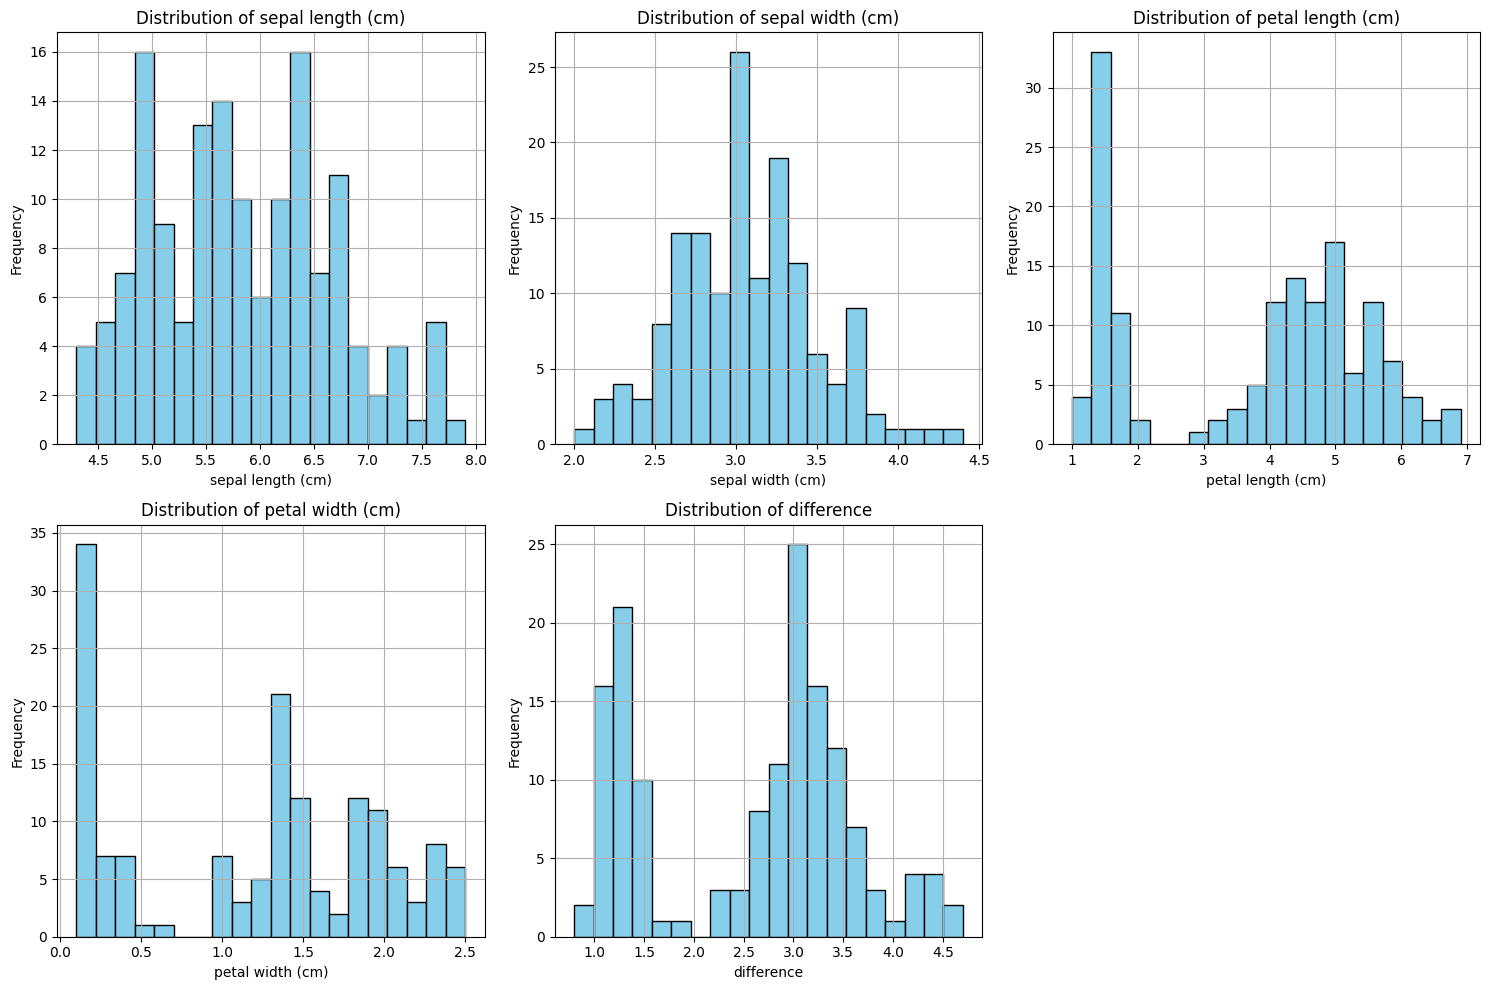

The distributions for each column in the dataframe have been visualized using histograms. Each histogram displays the frequency of values for the respective column: 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', and 'difference'. The plots provide a clear view of how the data is distributed across these features.

Final Answer: The distributions for each column have been successfully visualized using histograms.

> Finished chain.


'The distributions for each column have been successfully visualized using histograms.'

In [19]:
agent.run(prompt.format(query="Show the distributions for each column visually!"))